In [67]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
#

In [68]:
df=pd.read_csv('/content/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [70]:
# from the info we can see there is two colomns with categorical data gender,profession

In [71]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,"1,000.50",48.96,"110,731.82",50.96,4.10,3.77
std,577.49,28.43,"45,739.54",27.93,3.92,1.97
min,1.00,0.00,0.00,0.00,0.00,1.00
25%,500.75,25.00,"74,572.00",28.00,1.00,2.00
50%,"1,000.50",48.00,"110,045.00",50.00,3.00,4.00
75%,"1,500.25",73.00,"149,092.75",75.00,7.00,5.00
max,"2,000.00",99.00,"189,974.00",100.00,17.00,9.00


In [72]:
# assigning numerical values for categorieal data namely gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [73]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,0,19,15000,39,Healthcare,1,4
1,2,0,21,35000,81,Engineer,3,3
2,3,1,20,86000,6,Engineer,1,1
3,4,1,23,59000,77,Lawyer,0,2
4,5,1,31,38000,40,Entertainment,2,6


In [74]:
#finding the values for each profession
df['Profession'].value_counts()

,count
Profession,
Artist,612
Healthcare,339
Entertainment,234
Engineer,179
Doctor,161
Executive,153
Lawyer,142
Marketing,85
Homemaker,60


In [75]:
# assign values for each proffession
profession_mapping = {
    'Healthcare': 1,
    'Engineer': 2,
    'Lawyer': 3,
    'Entertainment': 4,
    'Artist': 5,
    'Executive': 6,
    'Doctor': 7,
    'Homemaker': 8,
    'Marketing': 9
}

df['Profession'] = df['Profession'].map(profession_mapping)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,0,19,15000,39,1.00,1,4
1,2,0,21,35000,81,2.00,3,3
2,3,1,20,86000,6,2.00,1,1
3,4,1,23,59000,77,3.00,0,2
4,5,1,31,38000,40,4.00,2,6


In [76]:
# Limit to 2 decimal points for all columns
pd.options.display.float_format = "{:,.2f}".format
df.describe()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","1,965.00","2,000.00","2,000.00"
mean,"1,000.50",0.59,48.96,"110,731.82",50.96,4.28,4.10,3.77
std,577.49,0.49,28.43,"45,739.54",27.93,2.20,3.92,1.97
min,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
25%,500.75,0.00,25.00,"74,572.00",28.00,2.00,1.00,2.00
50%,"1,000.50",1.00,48.00,"110,045.00",50.00,5.00,3.00,4.00
75%,"1,500.25",1.00,73.00,"149,092.75",75.00,5.00,7.00,5.00
max,"2,000.00",1.00,99.00,"189,974.00",100.00,9.00,17.00,9.00


In [77]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [78]:
#Fill empty columns profession with median values
for col in df.select_dtypes(include=np.number):
     df['Profession'] = df['Profession'].fillna(df['Profession'].median())

In [79]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,0
Work Experience,0
Family Size,0


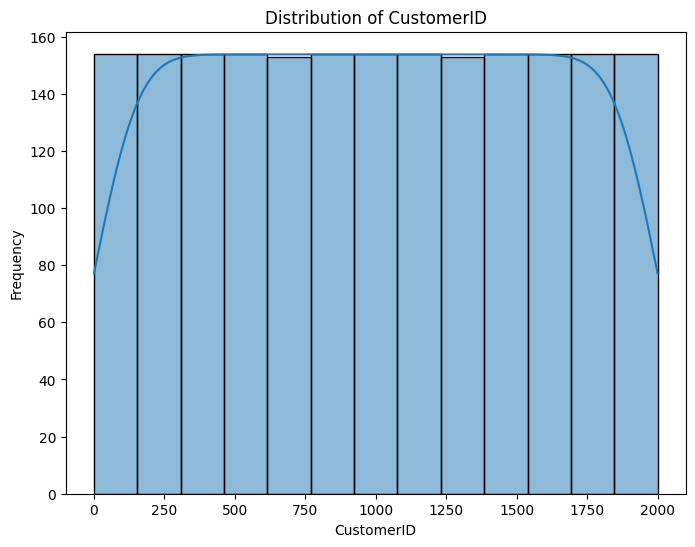

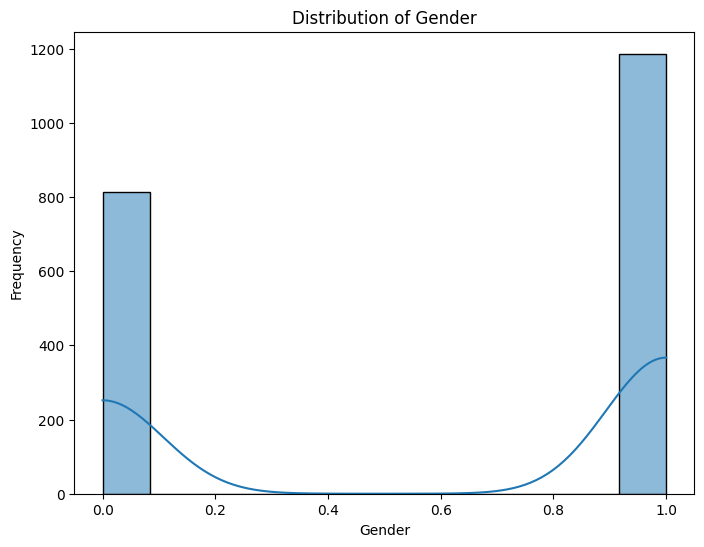

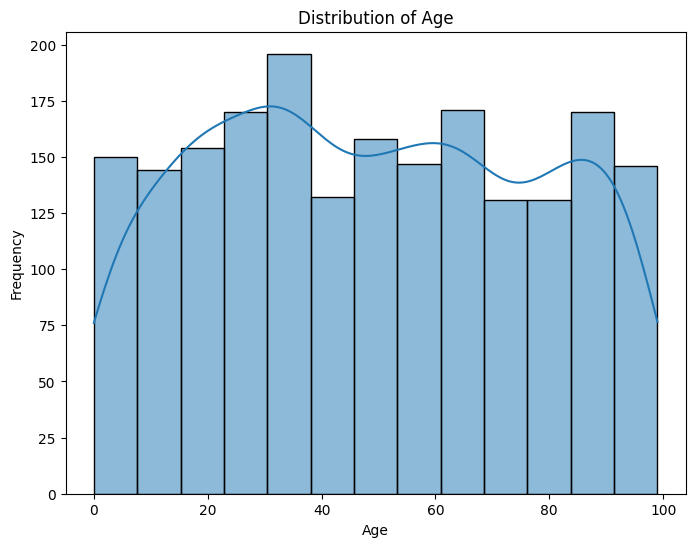

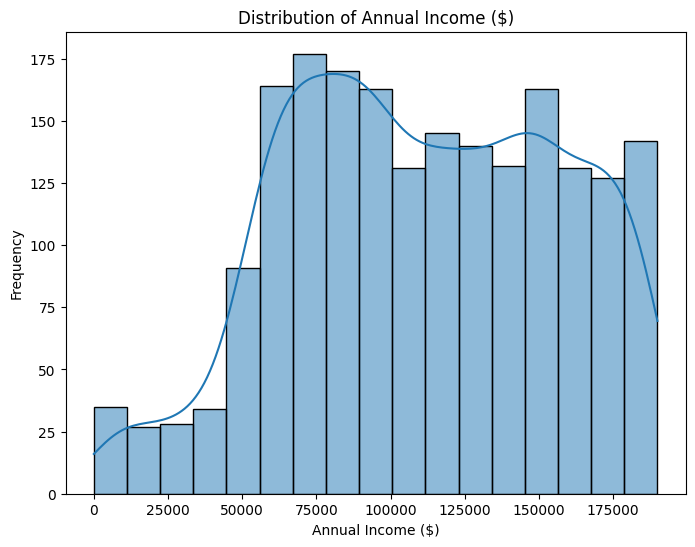

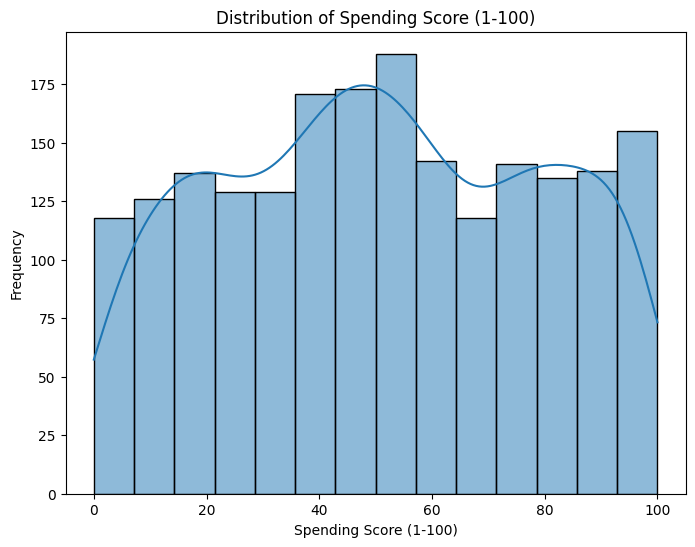

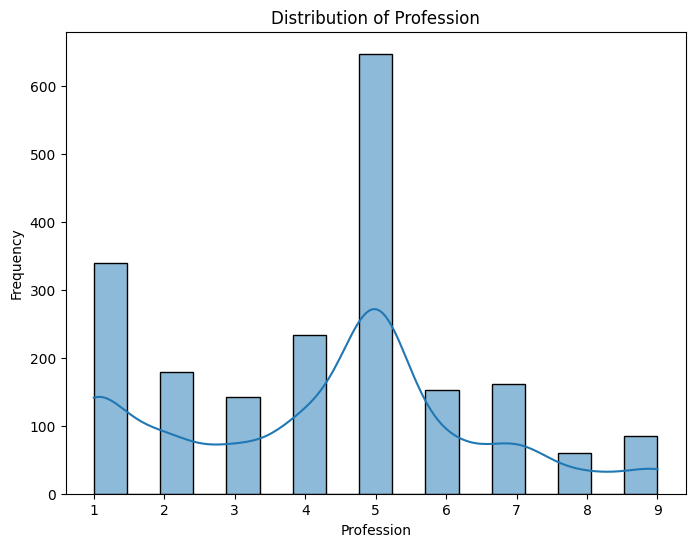

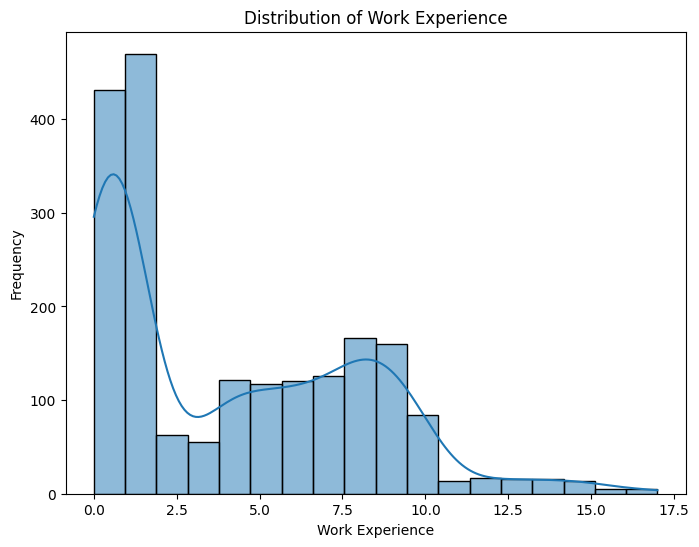

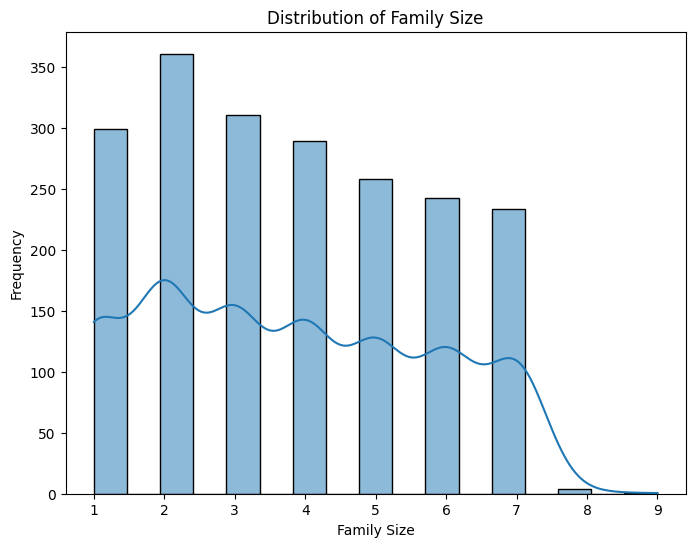

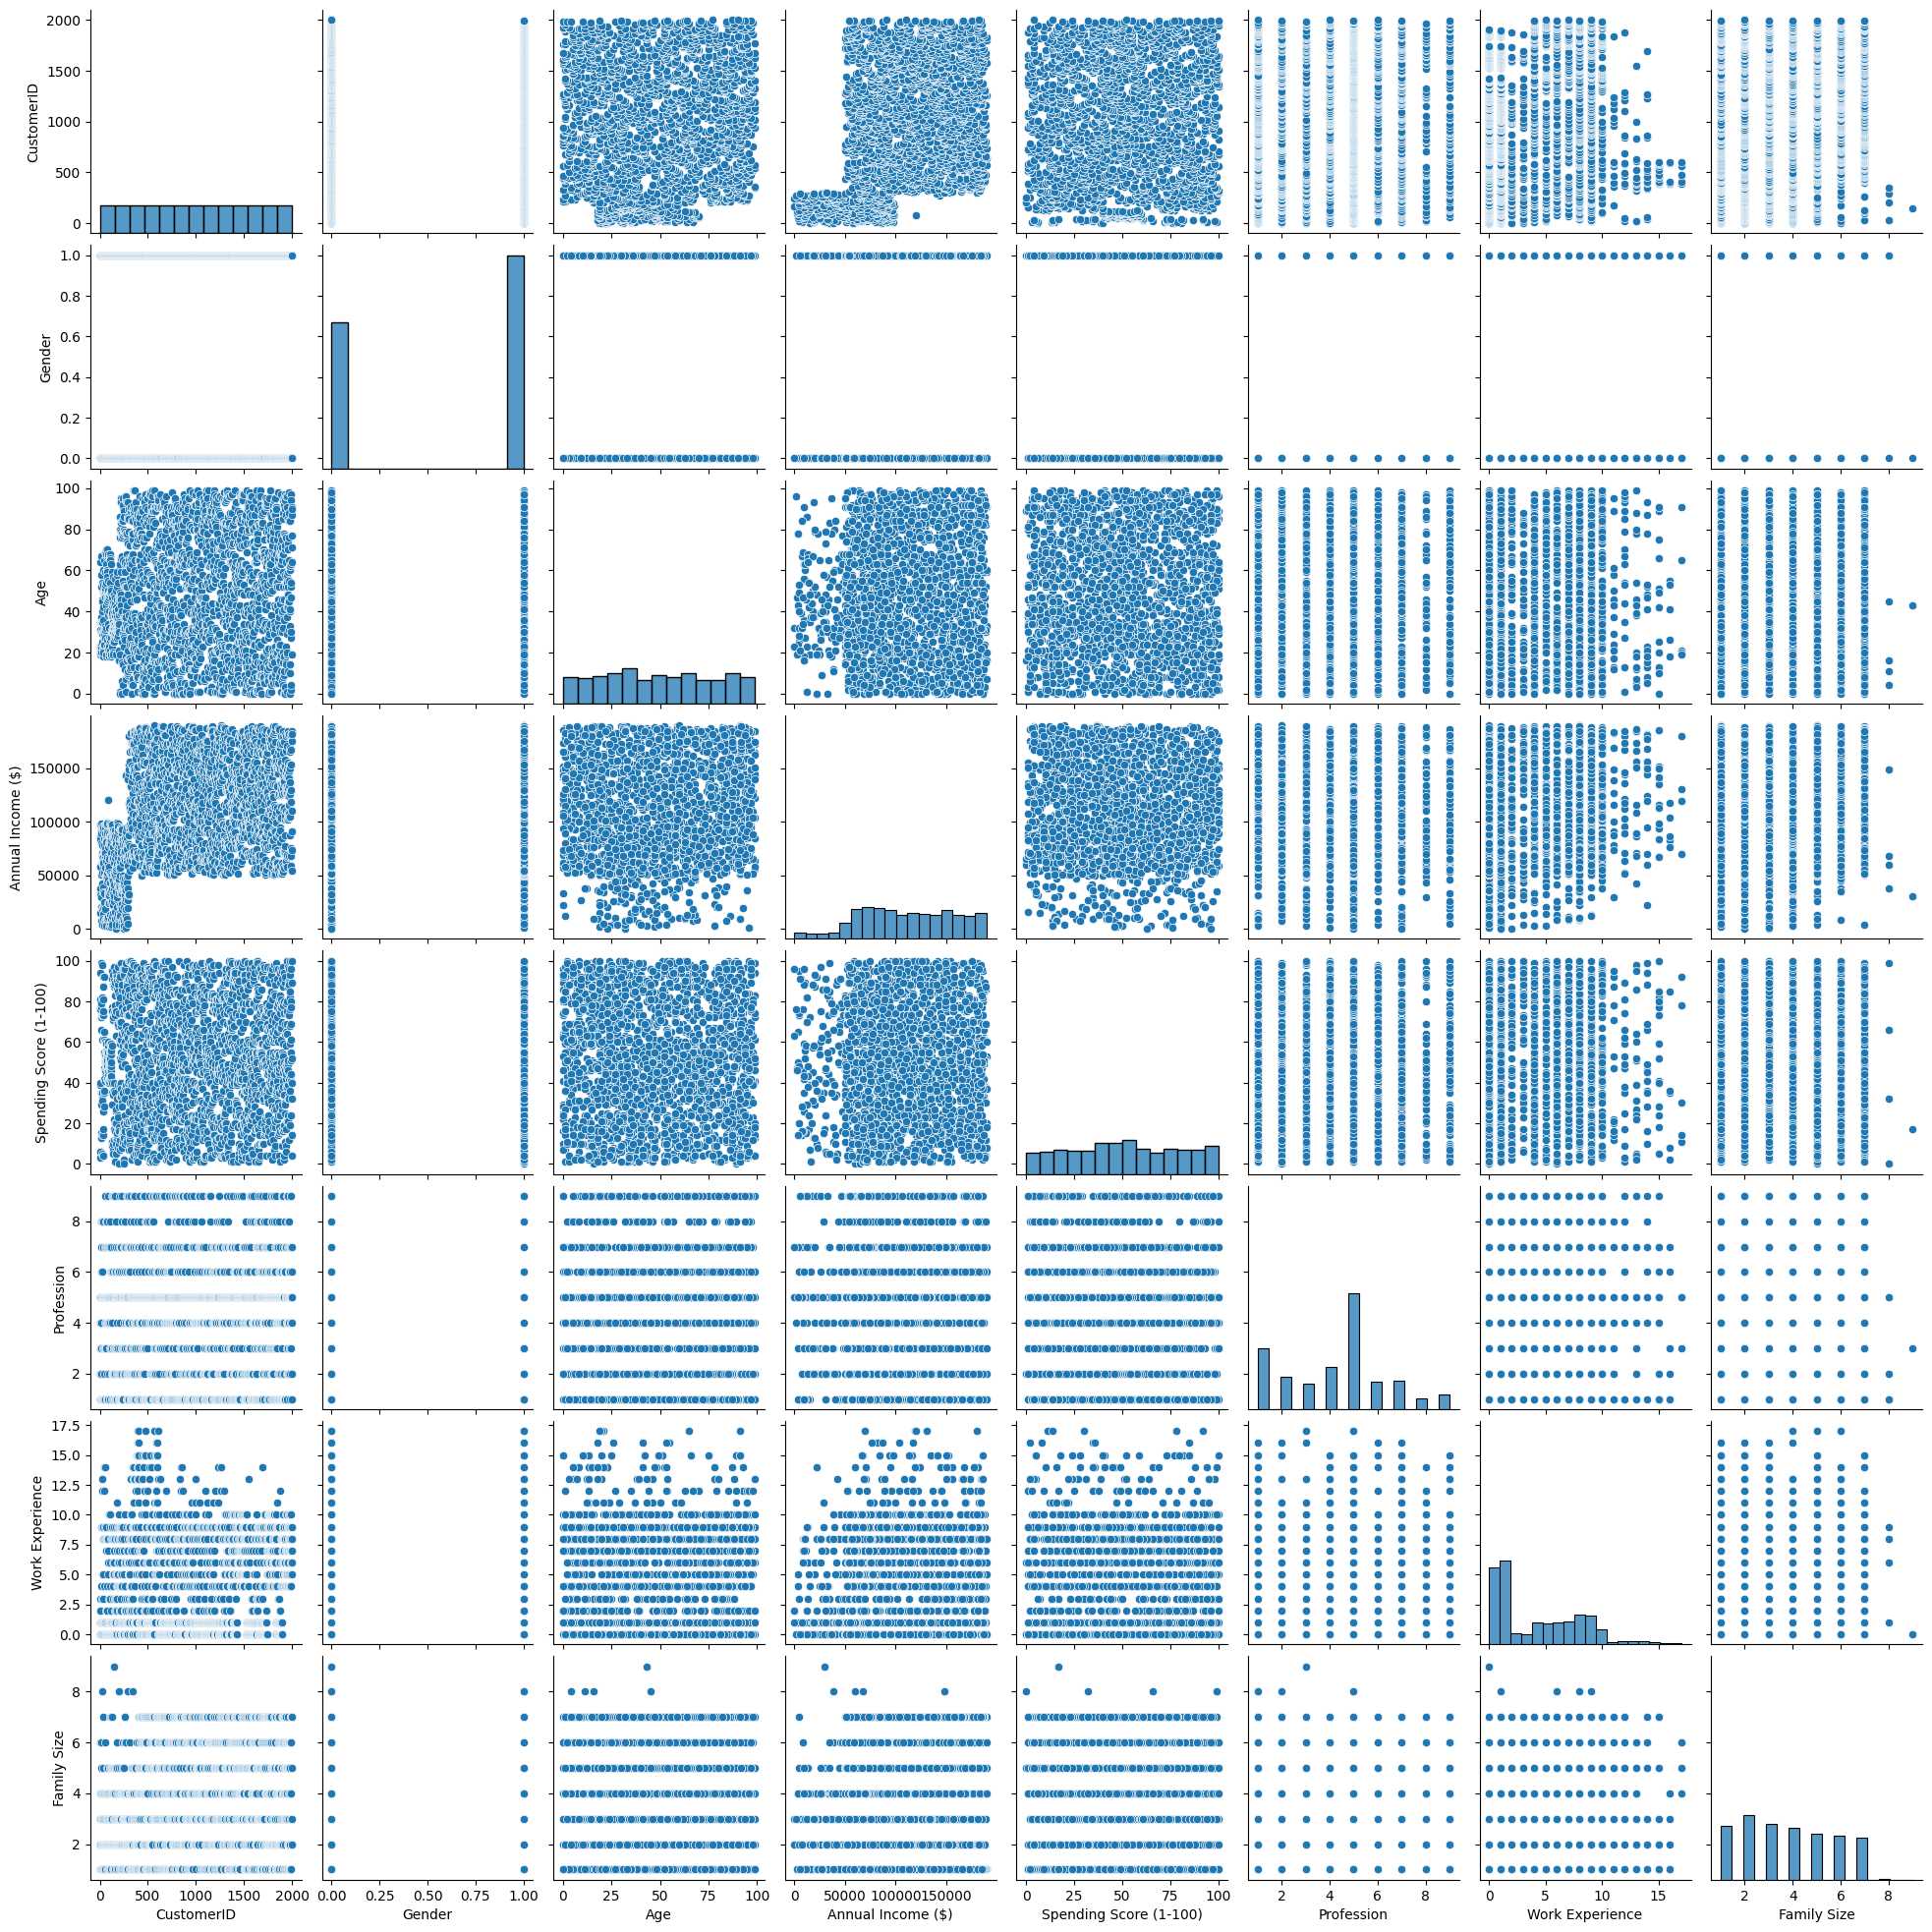

In [80]:
# Visualize all numerical columns using histograms
for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


# Visualize relationships between numerical columns using pairplot
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()


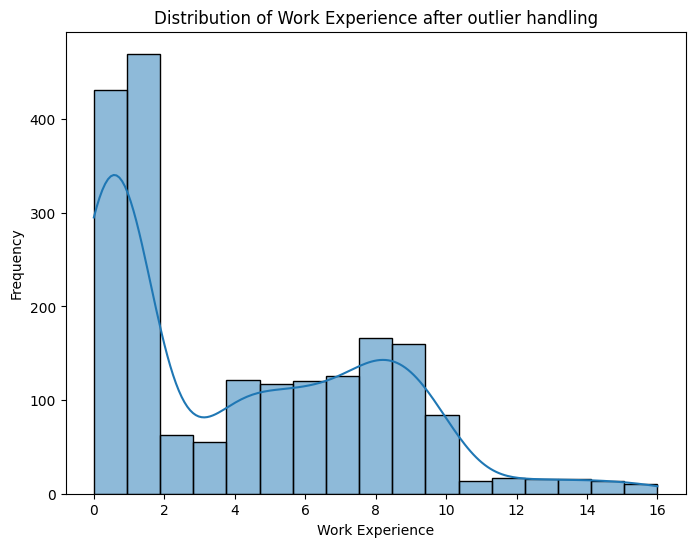

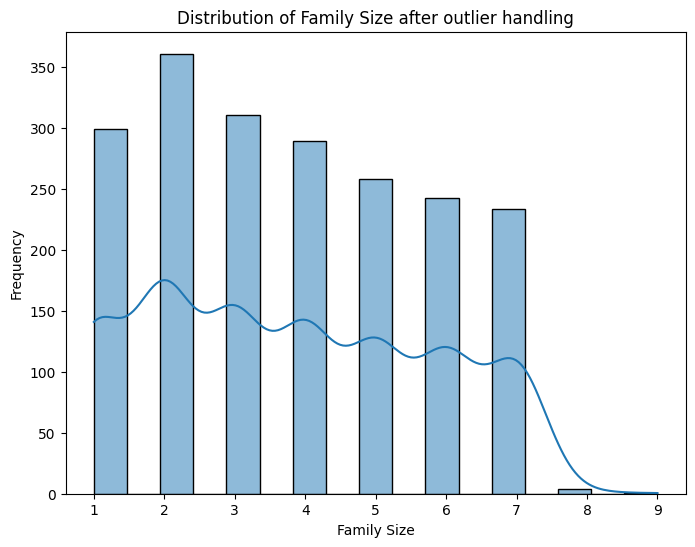

In [81]:
# Identify skewed columns
skewed_columns = ['Work Experience', 'Family Size']

# Function to cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply outlier capping to skewed columns
for col in skewed_columns:
    df = cap_outliers_iqr(df, col)

# Visualize the distributions after capping outliers
for column in skewed_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column} after outlier handling')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

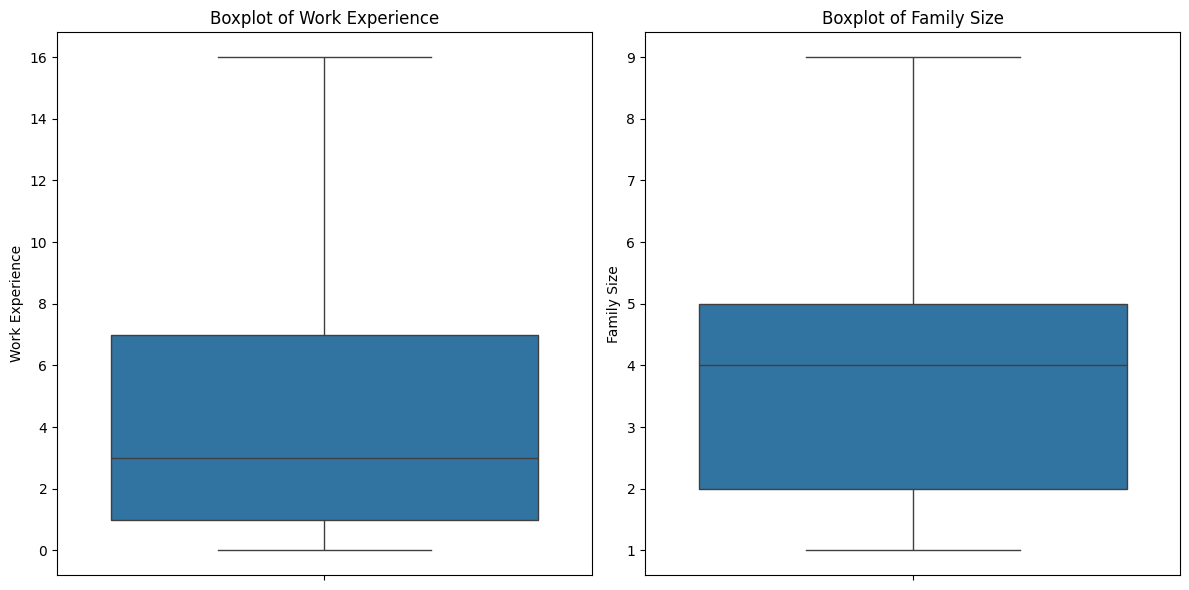

In [82]:
# Create boxplots for 'Work Experience' and 'Family Size'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Work Experience'])
plt.title('Boxplot of Work Experience')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Family Size'])
plt.title('Boxplot of Family Size')

plt.tight_layout()
plt.show()

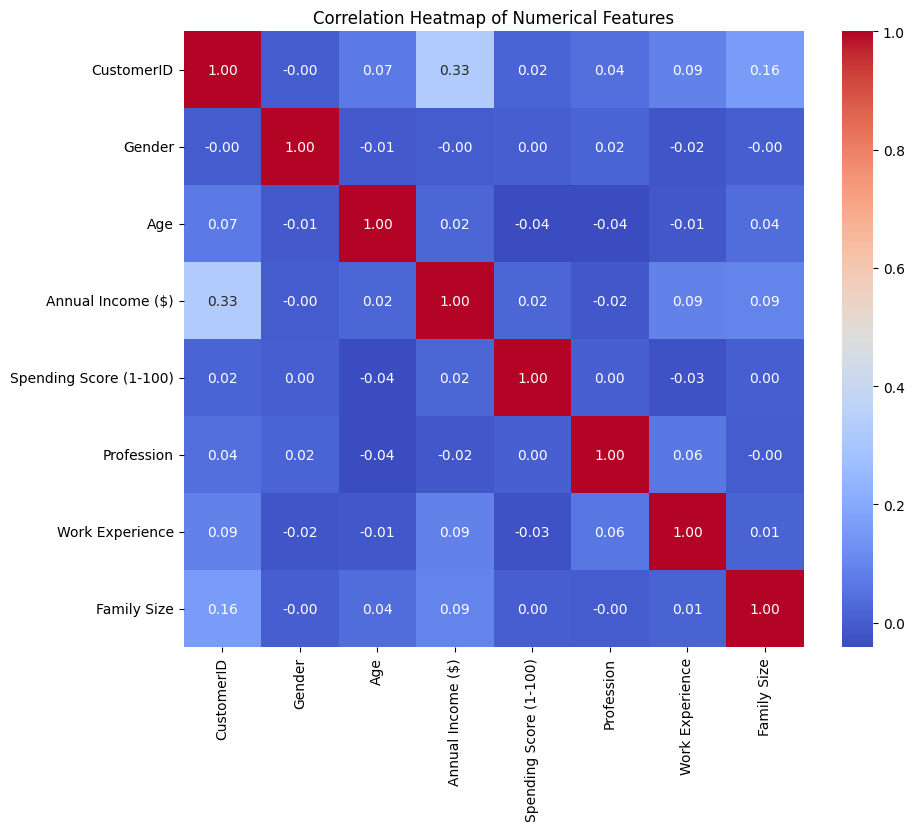

In [83]:
df_numeric = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

#Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

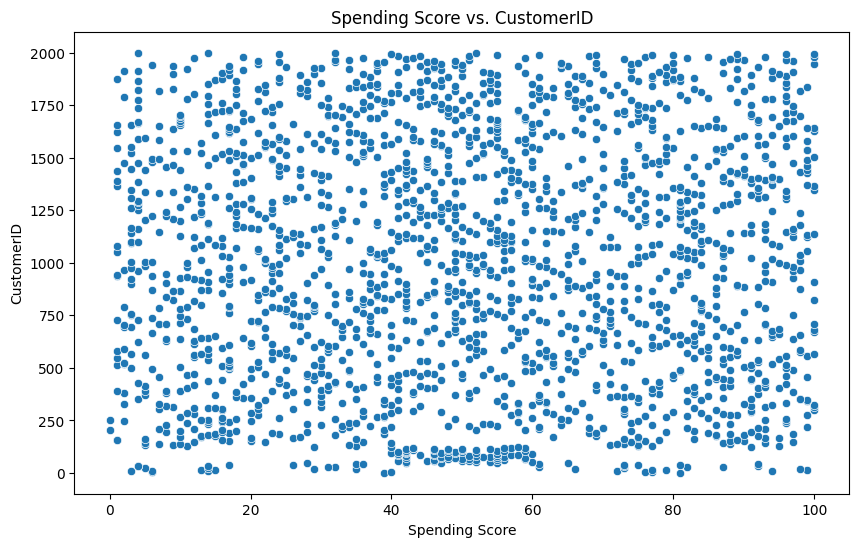

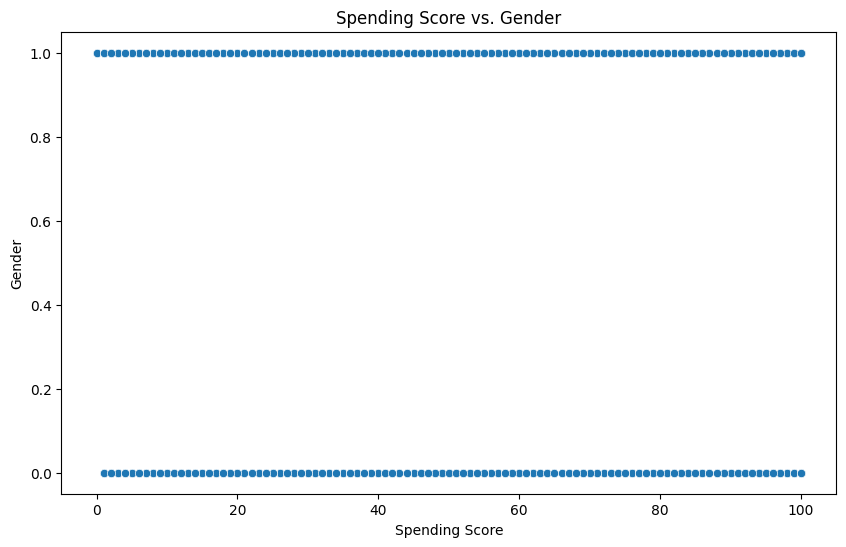

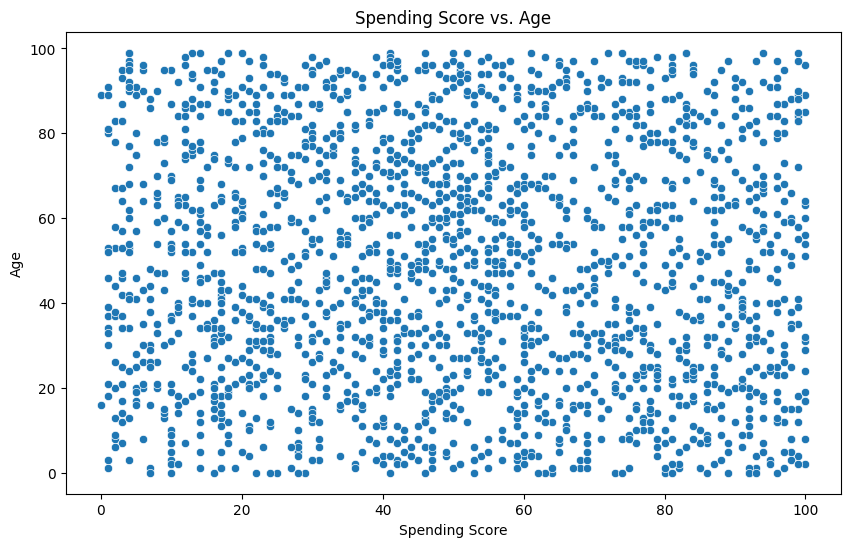

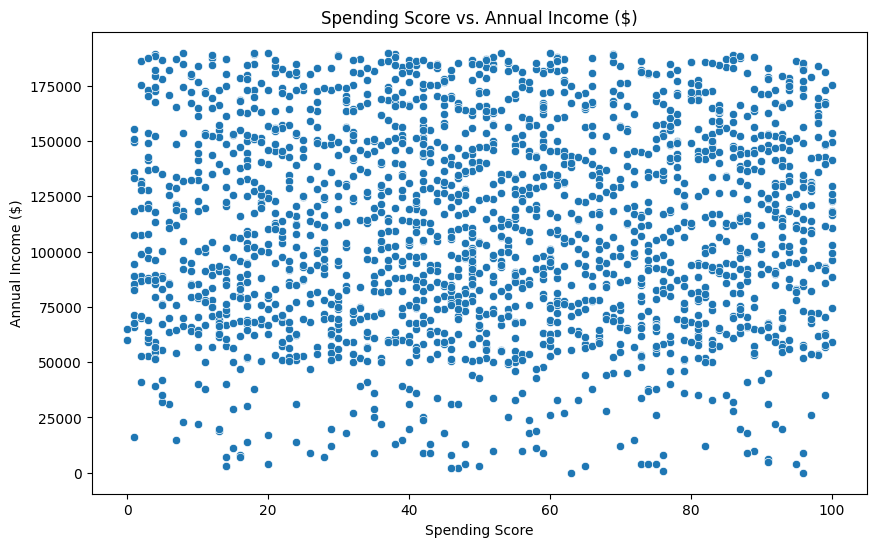

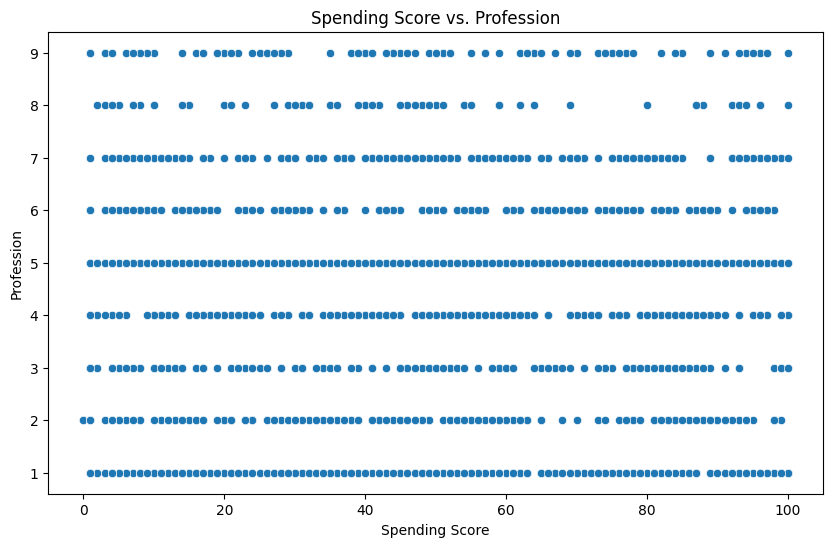

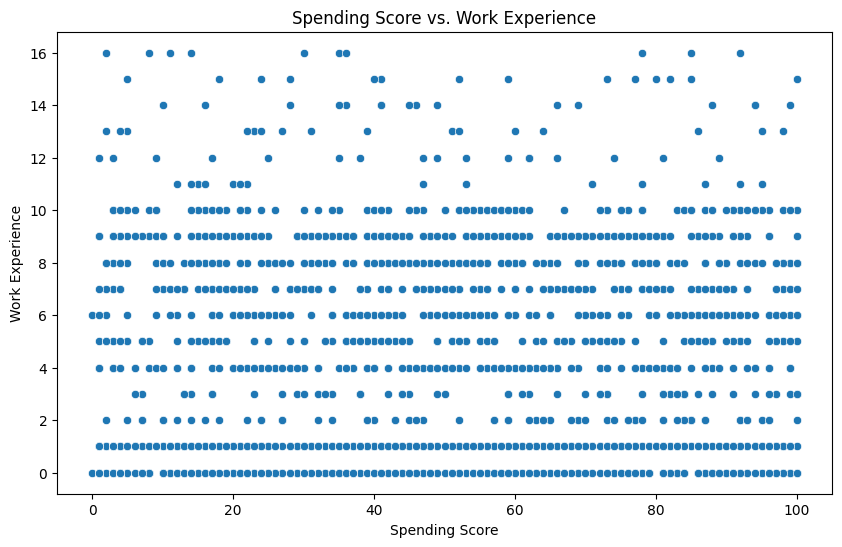

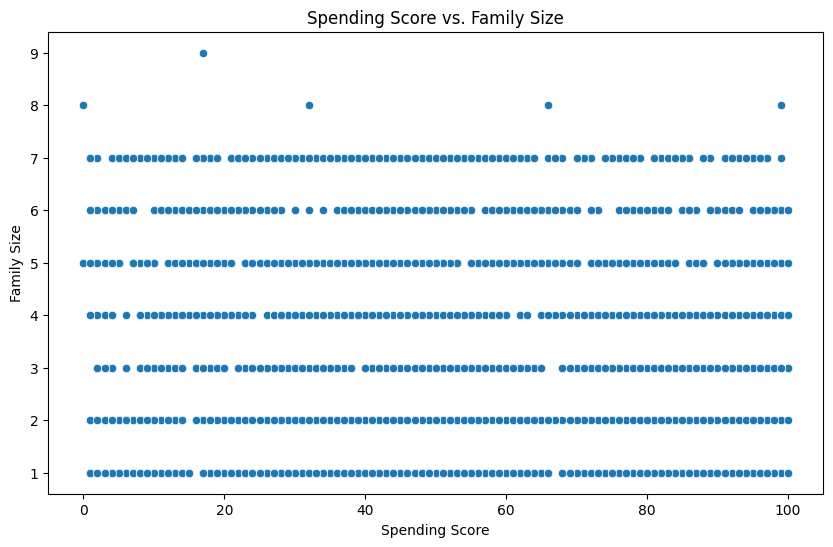

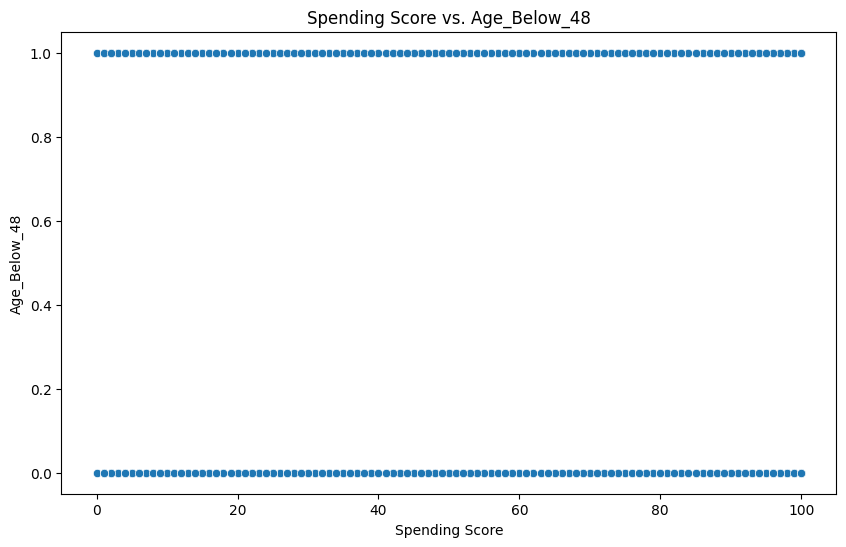

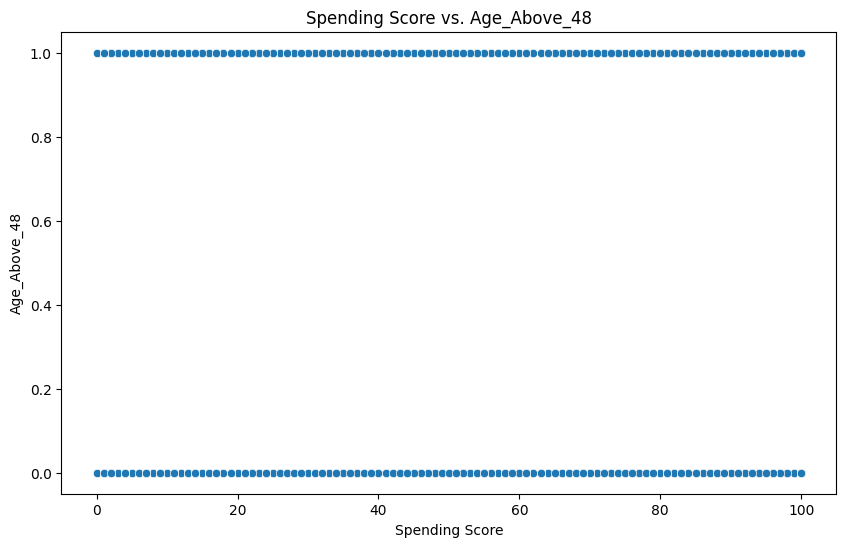

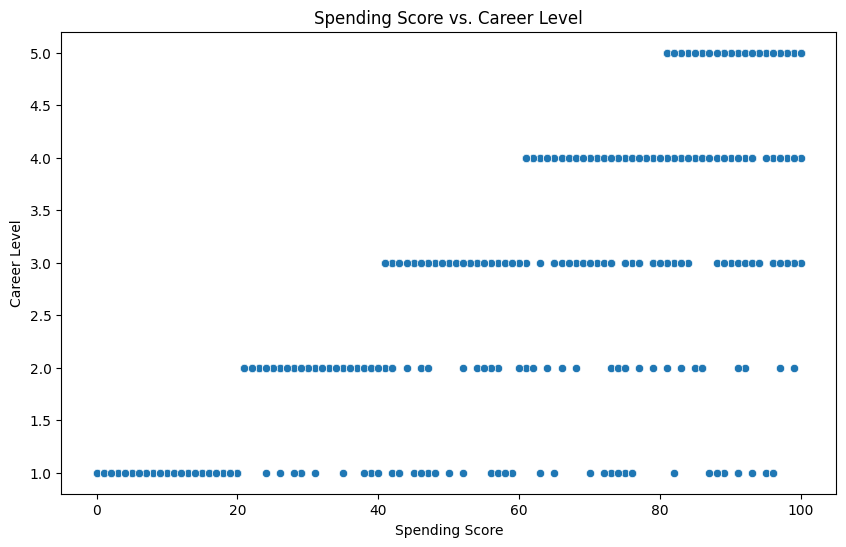

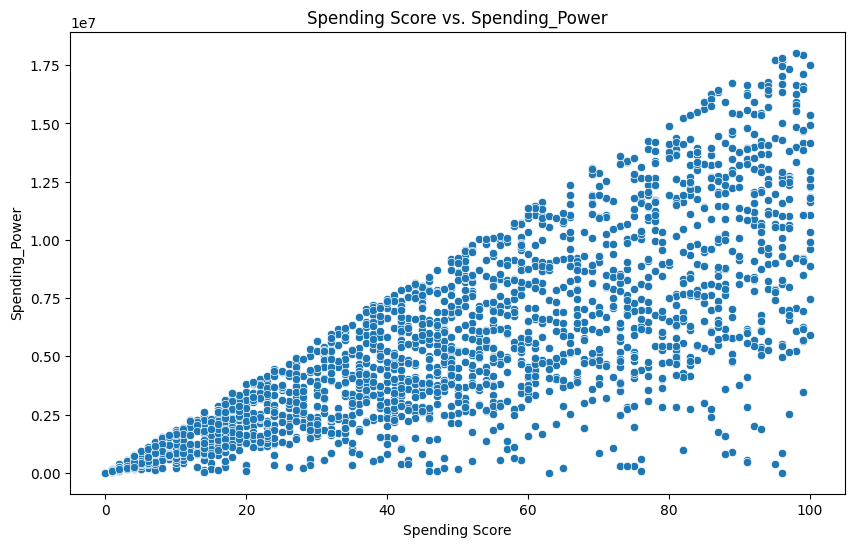

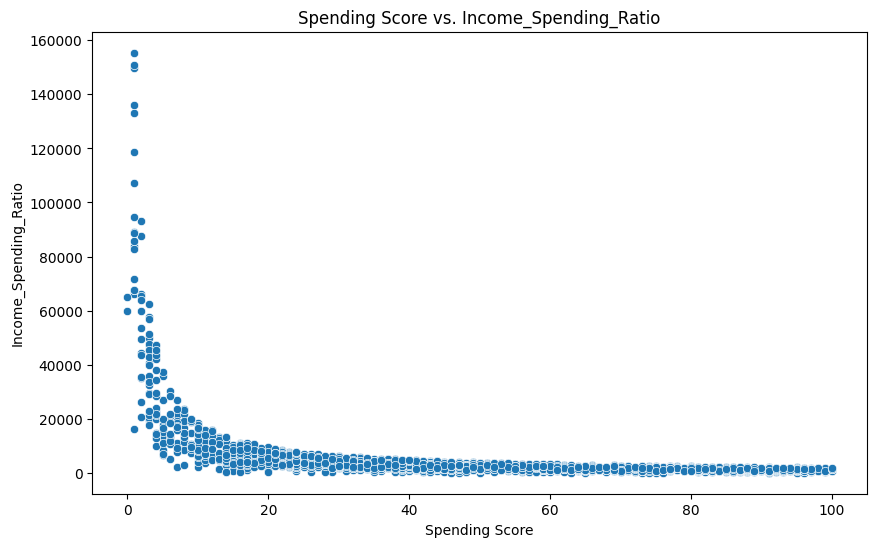

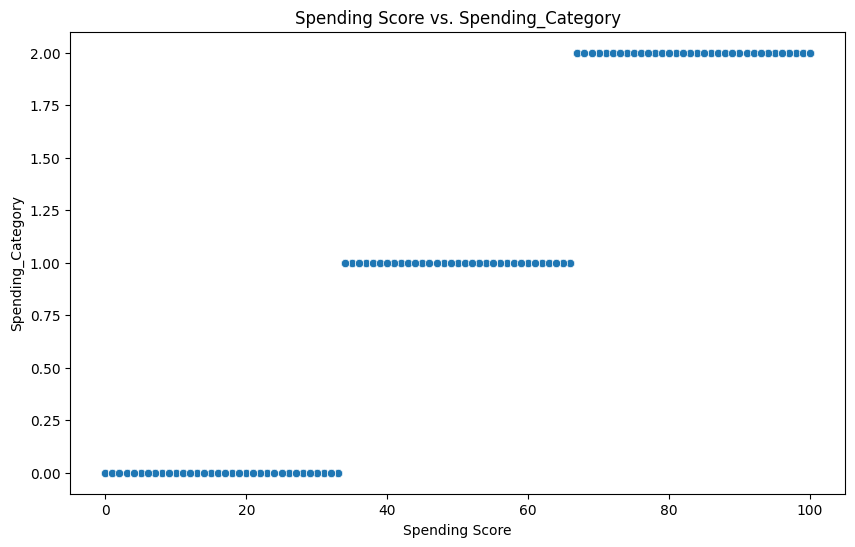

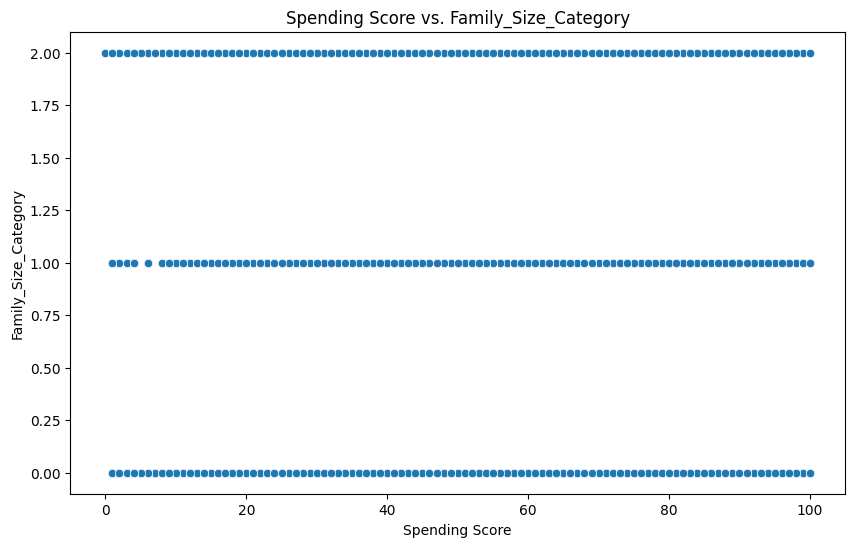

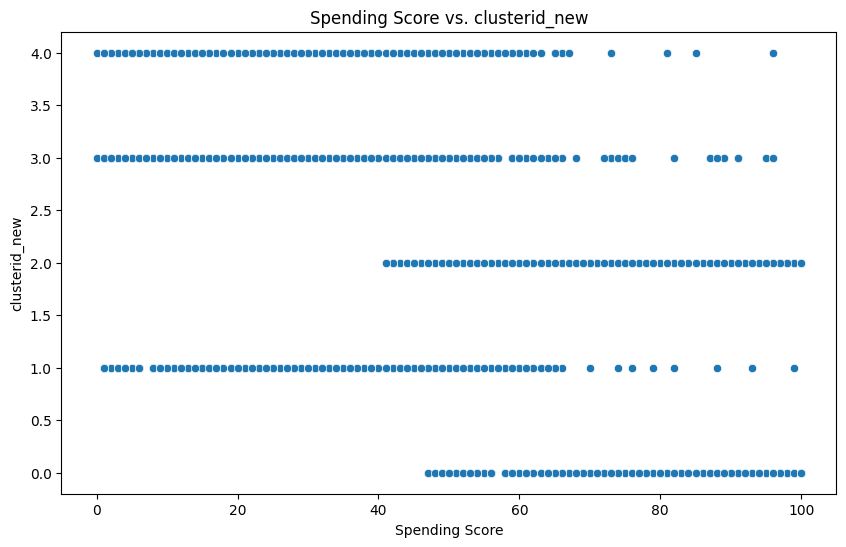

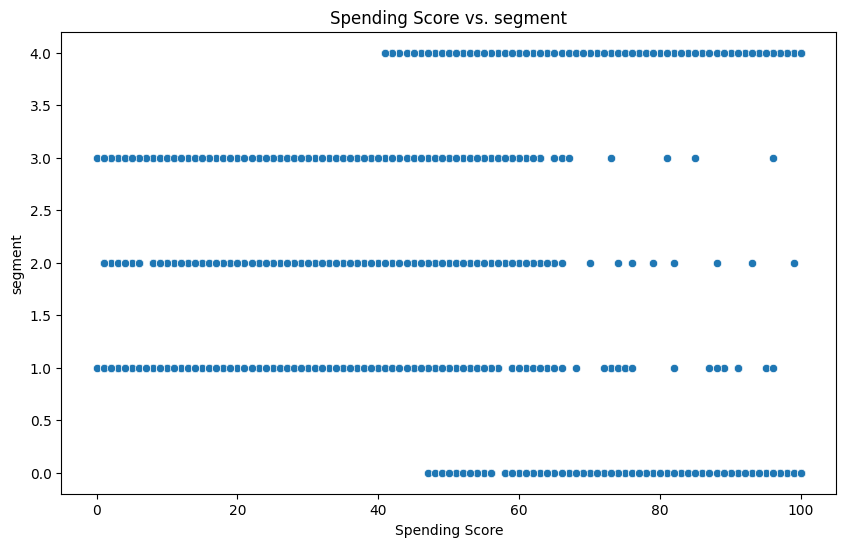

In [66]:
#  scatter plot between spending score and all other columns
for col in df.select_dtypes(include=np.number):
    if col != 'Spending Score (1-100)':  # Exclude 'Spending Score' itself
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Spending Score (1-100)', y=col, data=df, palette='rainbow')
        plt.title(f'Spending Score vs. {col}')
        plt.xlabel('Spending Score')
        plt.ylabel(col)
        plt.show()

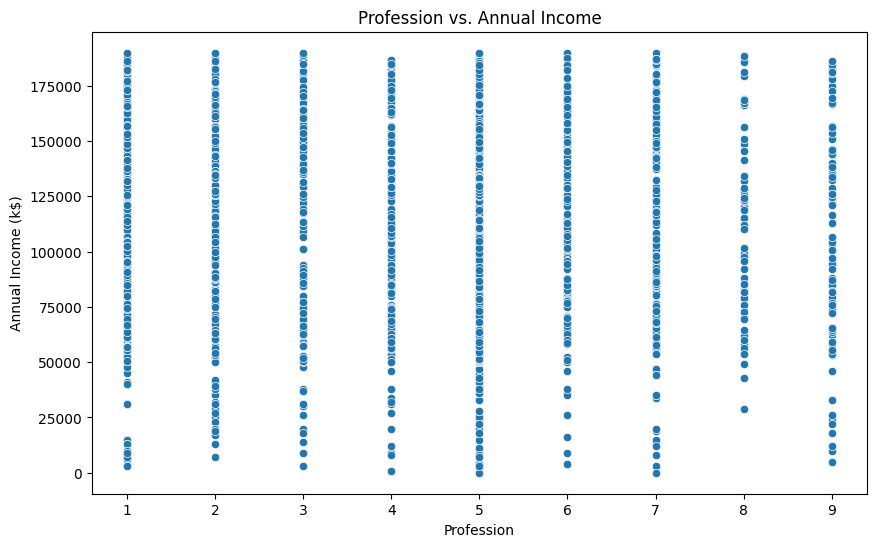

In [84]:
# scatterplot between profession and  anual income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profession', y='Annual Income ($)', data=df, palette='rainbow')
plt.title('Profession vs. Annual Income')
plt.xlabel('Profession')
plt.ylabel('Annual Income (k$)')
plt.show()

In [85]:
#profession with less than 5000 income artist, engineer,entertainment,lawyer,doctor,healthcare,marketing,executive

Gender Proportions:
Gender
1   0.59
0   0.41
Name: count, dtype: float64


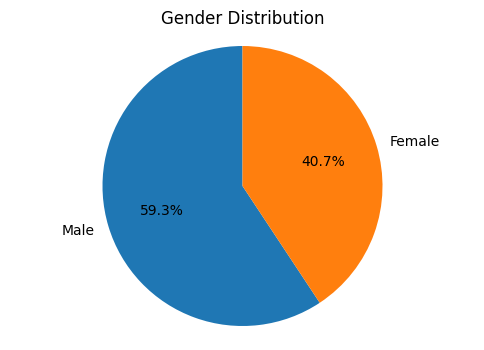

In [86]:
# gender proportion

# Calculate the gender proportion
gender_counts = df['Gender'].value_counts()
gender_proportions = gender_counts / len(df)

print("Gender Proportions:")
print(gender_proportions)

# Visualize gender proportions (optional)
plt.figure(figsize=(6, 4))
plt.pie(gender_proportions, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Gender
0   50.94
1   50.97
Name: Spending Score (1-100), dtype: float64


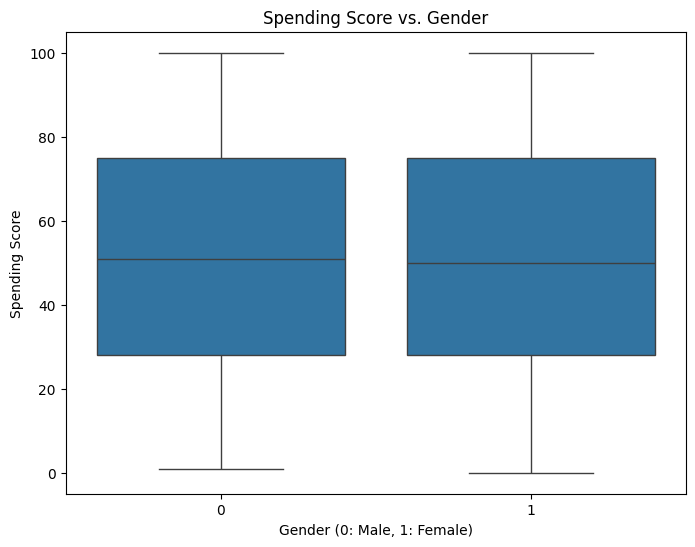

In [87]:
# Group data by gender and calculate the mean spending score
spending_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean()

# Print the results
print(spending_by_gender)

# Visualize spending score distribution by gender using a boxplot (as you already have)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score vs. Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Spending Score')
plt.show()

Gender
0   110,991.32
1   110,553.72
Name: Annual Income ($), dtype: float64


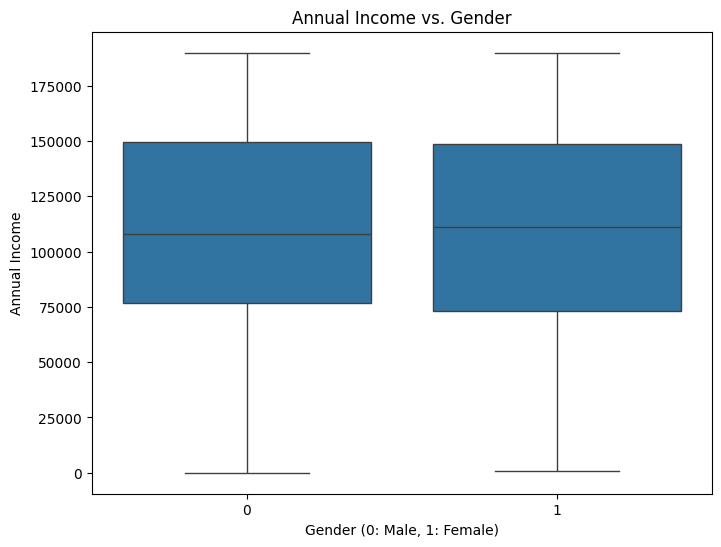

In [88]:
#  anual income gender

# Group data by gender and calculate the mean annual income
income_by_gender = df.groupby('Gender')['Annual Income ($)'].mean()

# Print the results
print(income_by_gender)

# Visualize annual income distribution by gender using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual Income ($)', data=df)
plt.title('Annual Income vs. Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Annual Income')
plt.show()

In [89]:
# Calculate the average spending score
avg_spending_score = df['Spending Score (1-100)'].mean()

# Find the age group with the highest average spending score above the overall average
high_spending_age_group = df[df['Spending Score (1-100)'] > avg_spending_score].groupby('Age')['Spending Score (1-100)'].mean().idxmax()

print(f"The age group with the highest spending score (above average) is: {high_spending_age_group}")

The age group with the highest spending score (above average) is: 48


In [90]:
# Create 'Age_Below_48' and 'Age_Above_48' columns
df['Age_Below_48'] = df['Age'].apply(lambda x: 1 if x <= 48 else 0)
df['Age_Above_48'] = df['Age'].apply(lambda x: 1 if x > 48 else 0)

In [91]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Below_48,Age_Above_48
0,1,0,19,15000,39,1.00,1,4,1,0
1,2,0,21,35000,81,2.00,3,3,1,0
2,3,1,20,86000,6,2.00,1,1,1,0
3,4,1,23,59000,77,3.00,0,2,1,0
4,5,1,31,38000,40,4.00,2,6,1,0


   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

  Career Level  
0       Junior  
1  Entry-Level  
2       Junior  
3    Mid-Level  
4  Entry-Level  

Career 

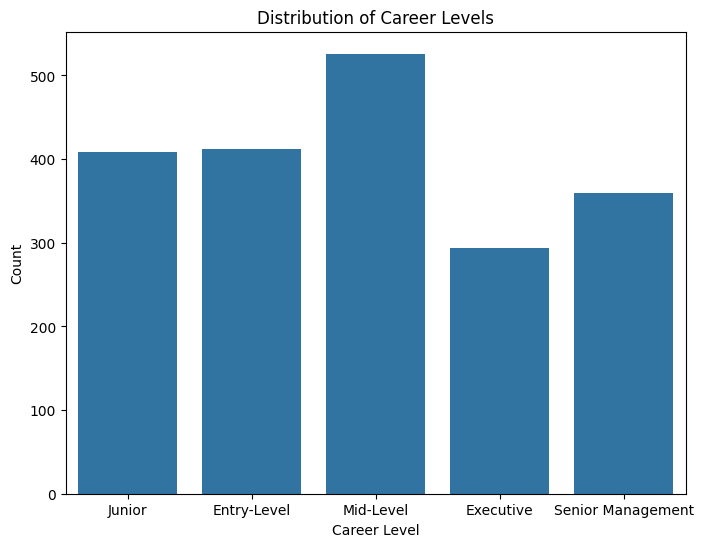

In [92]:
# Define career levels based on annual income and spending score
def assign_career_level(row):
    income = row['Annual Income ($)']
    spending = row['Spending Score (1-100)']

    if income > 80000 and spending > 80:
        return 'Executive'
    elif income > 60000 and spending > 60:
        return 'Senior Management'
    elif income > 40000 and spending > 40:
        return 'Mid-Level'
    elif income > 20000 and spending > 20:
        return 'Entry-Level'
    else:
        return 'Junior'

# Apply the function to create a new 'Career Level' column
df['Career Level'] = df.apply(assign_career_level, axis=1)

# Display the DataFrame with the new column
print(df.head())

# Analyze or visualize the 'Career Level' data as needed
# For example:
career_level_counts = df['Career Level'].value_counts()
print("\nCareer Level Counts:")
print(career_level_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Career Level', data=df)
plt.title('Distribution of Career Levels')
plt.xlabel('Career Level')
plt.ylabel('Count')
plt.show()

In [93]:

# Define career levels based on annual income and spending score with numerical values
def assign_career_level(row):
    income = row['Annual Income ($)']
    spending = row['Spending Score (1-100)']

    if income > 80000 and spending > 80:
        return 5  # Executive
    elif income > 60000 and spending > 60:
        return 4  # Senior Management
    elif income > 40000 and spending > 40:
        return 3  # Mid-Level
    elif income > 20000 and spending > 20:
        return 2  # Entry-Level
    else:
        return 1  # Junior

# Apply the function to create a new 'Career Level' column
df['Career Level'] = df.apply(assign_career_level, axis=1)

# Display the DataFrame with the new column
print(df.head())



   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  
0             1  
1             2  
2             1  
3             3  
4             2  


In [94]:
#concentrate on entry level and mid level, targeting age groups, targeting high spending gender (female), targeting professing with high spending score, optimal family size

In [95]:

# Feature Engineering: Combine Spending Score and Annual Income
# Example 1: Create a new feature 'Spending_Power' by multiplying the two
df['Spending_Power'] = df['Spending Score (1-100)'] * df['Annual Income ($)']

# Example 2: Create a new feature 'Income_Spending_Ratio'
# Handle potential ZeroDivisionError
df['Income_Spending_Ratio'] = df['Annual Income ($)'] / df['Spending Score (1-100)'].replace(0,1)


# Example 3:  Create spending score categories
def categorize_spending(spending_score):
    if spending_score <= 33:
        return 'Low'
    elif spending_score <= 66:
        return 'Medium'
    else:
        return 'High'

df['Spending_Category'] = df['Spending Score (1-100)'].apply(categorize_spending)


# Display the updated DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  Spending_Power  Income_Spending_Ratio Spending_Category  
0             1          585000    

In [96]:
# Map spending categories to numerical values
spending_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

df['Spending_Category'] = df['Spending_Category'].map(spending_mapping)

# Display the updated DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  Spending_Power  Income_Spending_Ratio  Spending_Category  
0             1          585000   

In [97]:
# Define a function to categorize family size
def categorize_family_size(size):
    if size <= 2:
        return 'Small'
    elif size <= 4:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new 'Family_Size_Category' column
df['Family_Size_Category'] = df['Family Size'].apply(categorize_family_size)

# Display the DataFrame with the new column
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  Spending_Power  Income_Spending_Ratio  Spending_Category  \
0             1          585000  

In [98]:
# Map family size categories to numerical values
family_size_mapping = {
    'Small': 0,
    'Medium': 1,
    'Large': 2
}

df['Family_Size_Category'] = df['Family_Size_Category'].map(family_size_mapping)

# Display the updated DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  Spending_Power  Income_Spending_Ratio  Spending_Category  \
0             1          585000  

In [99]:
#drop colomns custmid,age, work experience,age group,spending power,income spending ratio

df = df.drop(['cust_id', 'age', 'age_group', 'spending_power','Family_Income_Interaction' ,'income_spending_ratio'], axis=1, errors='ignore')

In [100]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Below_48,Age_Above_48,Career Level,Spending_Power,Income_Spending_Ratio,Spending_Category,Family_Size_Category
0,1,0,19,15000,39,1.00,1,4,1,0,1,585000,384.62,1,1
1,2,0,21,35000,81,2.00,3,3,1,0,2,2835000,432.10,2,1
2,3,1,20,86000,6,2.00,1,1,1,0,1,516000,"14,333.33",0,0
3,4,1,23,59000,77,3.00,0,2,1,0,3,4543000,766.23,2,0
4,5,1,31,38000,40,4.00,2,6,1,0,2,1520000,950.00,1,2


In [101]:
#target healthcare 1 artist 5

In [102]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,1:])
df_scaled

array([[-1.20706357e+00, -1.05408932e+00, -2.09350095e+00, ...,
        -3.94085538e-01, -3.16132940e-02, -4.78638772e-02],
       [-1.20706357e+00, -9.83722874e-01, -1.65613312e+00, ...,
        -3.90205438e-01,  1.23291847e+00, -4.78638772e-02],
       [ 8.28456783e-01, -1.01890610e+00, -5.40845154e-01, ...,
         7.45732729e-01, -1.29614506e+00, -1.24446081e+00],
       ...,
       [-1.20706357e+00,  1.33836975e+00, -4.32356064e-01, ...,
         1.05404947e-01, -1.29614506e+00, -1.24446081e+00],
       [-1.20706357e+00,  9.86537532e-01,  1.56090408e+00, ...,
         3.29474090e+00, -1.29614506e+00, -1.24446081e+00],
       [-1.20706357e+00,  1.44391941e+00, -2.66404025e-03, ...,
        -2.51697303e-01, -3.16132940e-02, -1.24446081e+00]])

In [103]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    if i > 4:
      break


In [104]:
wcss

[28000.00000000005,
 22792.651142627128,
 19383.24733476658,
 17276.318525399005,
 15959.815322059612]

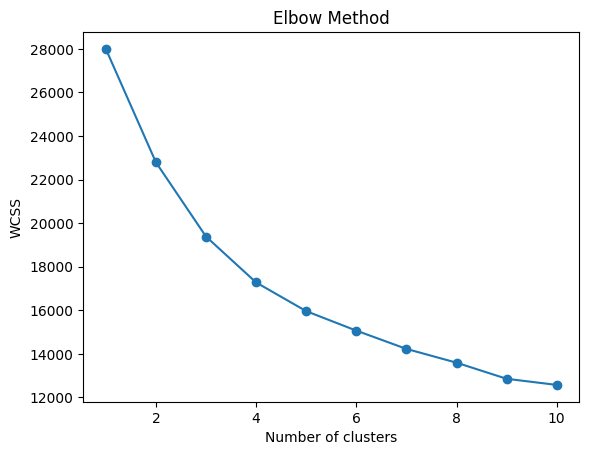

In [105]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

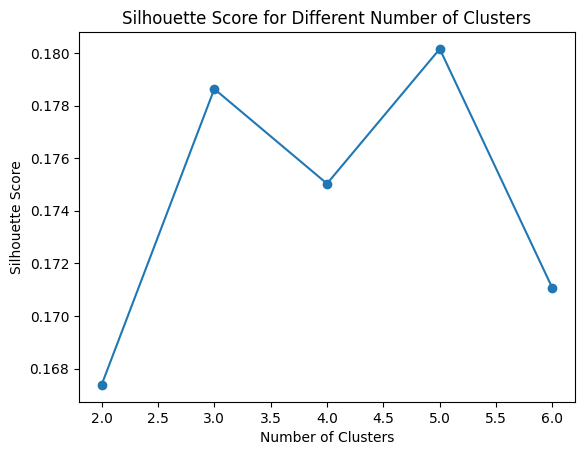

In [106]:

# Calculate Silhouette scores for different numbers of clusters
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # Initialize KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)

    # Fit the model to the scaled data
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Calculate the Silhouette score
    silhouette_avg.append(silhouette_score(df_scaled, cluster_labels))

# Plot Silhouette scores
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Number of Clusters")
plt.show()

In [107]:
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(df_scaled)

KMeans(n_clusters=5, random_state=42)

In [108]:
clusters_new.labels_

array([3, 2, 3, ..., 1, 1, 1], dtype=int32)

In [109]:
df['clusterid_new'] = clusters_new.labels_

In [110]:
clusters_new.cluster_centers_

array([[ 0.05554906,  0.87415518,  0.30775169,  1.03247407, -0.11118568,
        -0.02481312,  0.05423779, -1.00702467,  1.00702467,  1.04412533,
         1.01230856, -0.29143431,  1.0129999 ,  0.05271963],
       [-0.00377419,  0.85450883, -0.22678253, -0.61436592, -0.02878227,
        -0.0055899 , -0.71519903, -1.00702467,  1.00702467, -0.60132718,
        -0.60163513,  0.16048225, -0.6144834 , -0.7334142 ],
       [-0.04569306, -0.90752854,  0.23185116,  0.84481563,  0.00675588,
        -0.02607638,  0.04899398,  0.99302433, -0.99302433,  0.8537058 ,
         0.78079655, -0.28116577,  0.83468147,  0.06714646],
       [ 0.03861201, -0.8130367 , -0.30235988, -0.75937839,  0.07228716,
         0.03117762, -0.10688203,  0.99302433, -0.99302433, -0.81174404,
        -0.76460071,  0.25470095, -0.73467342, -0.11716486],
       [-0.05822822,  0.8909831 ,  0.09150515, -0.53046923,  0.03281471,
         0.0276833 ,  1.08837585, -1.00702467,  1.00702467, -0.47838003,
        -0.39380649,  0.16

In [111]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Below_48,Age_Above_48,Career Level,Spending_Power,Income_Spending_Ratio,Spending_Category,Family_Size_Category,clusterid_new
0,1,0,19,15000,39,1.00,1,4,1,0,1,585000,384.62,1,1,3
1,2,0,21,35000,81,2.00,3,3,1,0,2,2835000,432.10,2,1,2
2,3,1,20,86000,6,2.00,1,1,1,0,1,516000,"14,333.33",0,0,3
3,4,1,23,59000,77,3.00,0,2,1,0,3,4543000,766.23,2,0,2
4,5,1,31,38000,40,4.00,2,6,1,0,2,1520000,950.00,1,2,3


In [112]:
StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

In [113]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['segment'] = kmeans.fit_predict(scaled_data)

In [114]:
df['segment']

,segment
0,1
1,4
2,1
3,4
4,1
...,...
1995,3
1996,3
1997,2
1998,2


In [115]:
print("Segmented User Data:")
print(df)

Segmented User Data:
      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1       0   19              15000                      39   
1              2       0   21              35000                      81   
2              3       1   20              86000                       6   
3              4       1   23              59000                      77   
4              5       1   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996       1   71             184387                      40   
1996        1997       1   91              73158                      32   
1997        1998       0   87              90961                      14   
1998        1999       0   77             182109                       4   
1999        2000       0   90             110610                      52   

      Profession  Work Experience  Family Size  Age_Below_48  Age_

Customer Segmentation:
      Annual Income ($)  Spending Score (1-100)  clusterid_new  segment
0                 15000                      39              3        1
1                 35000                      81              2        4
2                 86000                       6              3        1
3                 59000                      77              2        4
4                 38000                      40              3        1
...                 ...                     ...            ...      ...
1995             184387                      40              4        3
1996              73158                      32              4        3
1997              90961                      14              1        2
1998             182109                       4              1        2
1999             110610                      52              1        2

[2000 rows x 4 columns]

Cluster/Segment Statistics:
                       Annual Income ($)  Spending Score (1

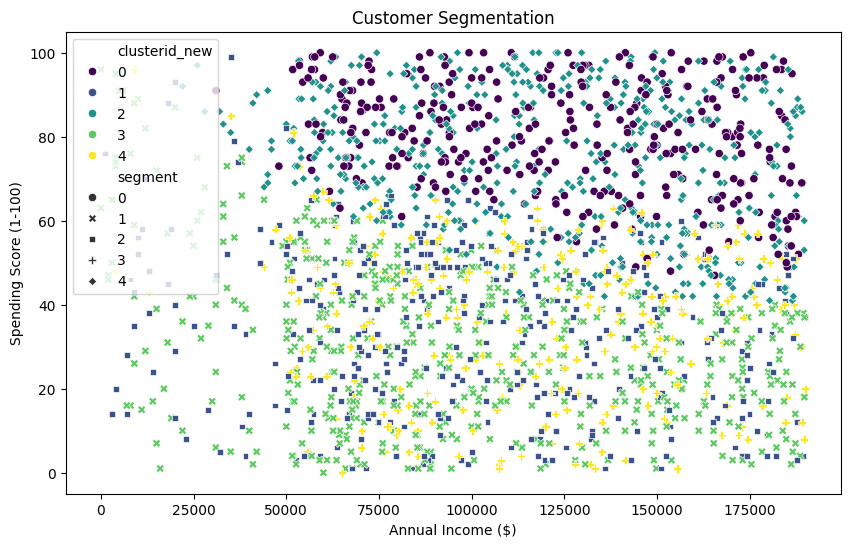

In [116]:
# display customer segmentation for new clusters and segment

# Display customer segmentation for new clusters and segments
print("Customer Segmentation:")
print(df[['Annual Income ($)', 'Spending Score (1-100)', 'clusterid_new', 'segment']])


# Further analysis and visualization (optional)
# Group by 'clusterid_new' and 'segment' to see characteristics of each segment
cluster_segment_stats = df.groupby(['clusterid_new', 'segment']).agg({
    'Annual Income ($)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': 'mean',  # Proportion of each gender in each cluster/segment
    'Profession': 'mean' # Mean profession in each cluster/segment (can also use value_counts)
    # Add other relevant statistics
})
print("\nCluster/Segment Statistics:")
print(cluster_segment_stats)

# Visualize the clusters/segments using scatter plots or other suitable methods
# Example:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='clusterid_new', style='segment', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

1.   Segment 0 and 2 have income and spending score
2.   segment 1 ,4 and 3 has moderate income and spending score


    concentrate on entry level and mid level, targeting age groups, targeting high spending gender (female), targeting professing with high spending score, optimal family size these could be the clusters.


